Размер датасета: (1262687, 6)

Первые строки данных:
         randomized_id        lat        lng         alt        spd  \
0  7637058049336049989  51.095460  71.427530  350.531020   0.206810   
1  1259981924615926140  51.098200  71.412950  348.801610   0.000000   
2  1259981924615926140  51.098460  71.412120  349.273880   4.345010   
3  7180852955221959108  51.089779  71.428469  314.000000  14.326102   
4 -6683155579225977143  51.088782  71.417462  325.300018   0.000602   

          azm  
0   13.601680  
1  265.677000  
2  307.245300  
3  192.123672  
4    0.000000  

Статистика (describe):
       randomized_id           lat           lng           alt           spd  \
count   1.262687e+06  1.262687e+06  1.262687e+06  1.262687e+06  1.262687e+06   
mean   -4.289119e+16  5.109139e+01  7.141723e+01  3.274945e+02  6.917206e+00   
std     5.306547e+18  6.624849e-03  9.686699e-03  2.012576e+01  5.903949e+00   
min    -9.221305e+18  5.107581e+01  7.139495e+01 -1.914000e+02 -1.000000e+00   


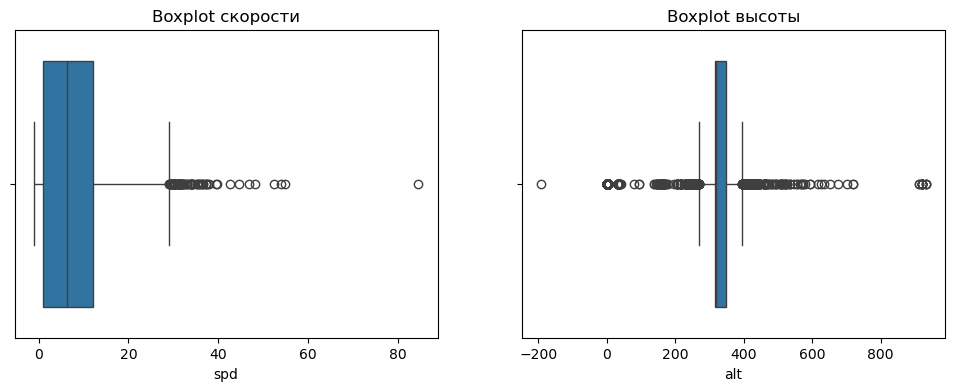

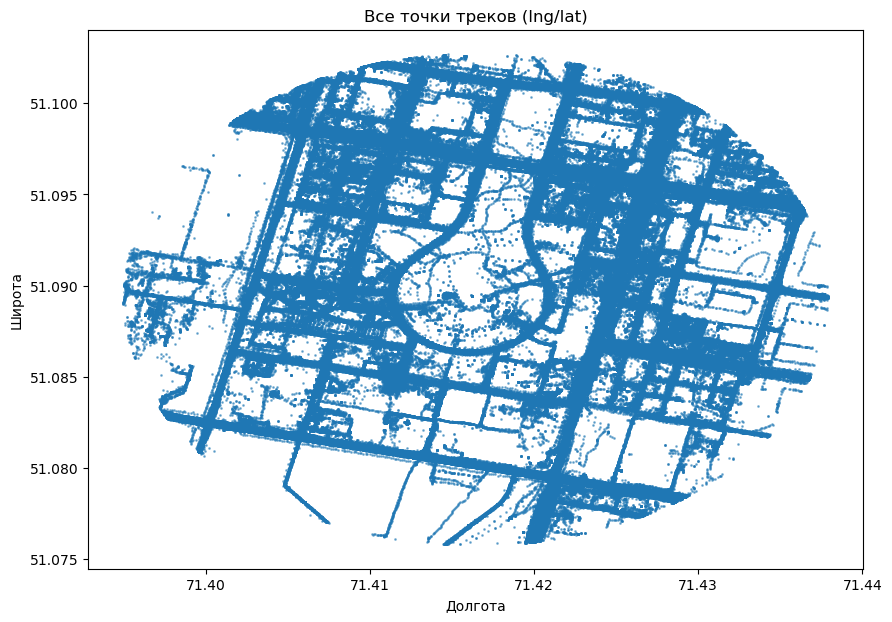


Корреляция между числовыми признаками:
          lat       lng       alt       spd       azm
lat  1.000000  0.042960  0.035613 -0.088968  0.011006
lng  0.042960  1.000000  0.009004 -0.018151  0.027662
alt  0.035613  0.009004  1.000000  0.073364  0.102377
spd -0.088968 -0.018151  0.073364  1.000000  0.176404
azm  0.011006  0.027662  0.102377  0.176404  1.000000


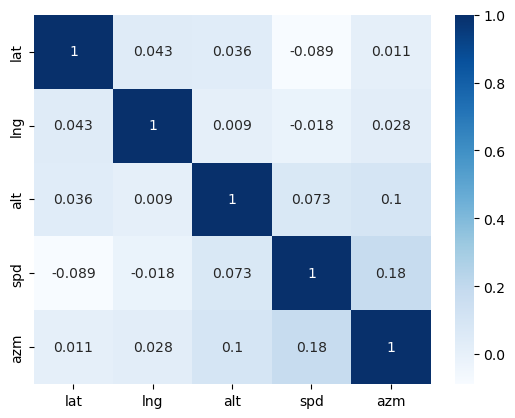

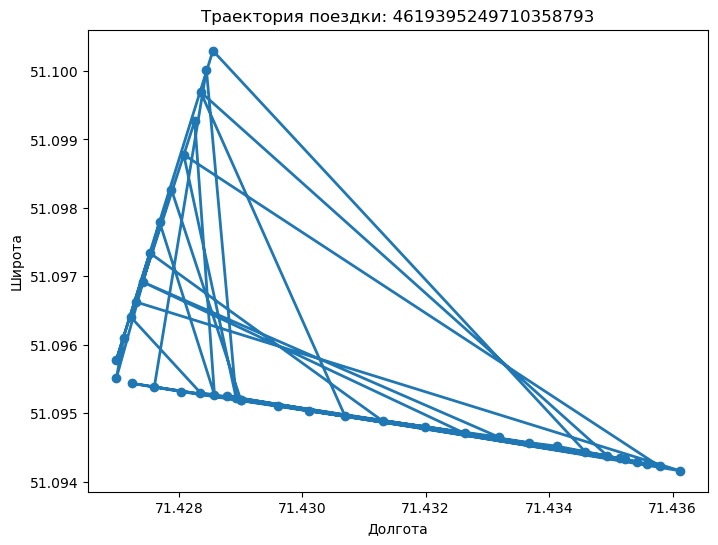

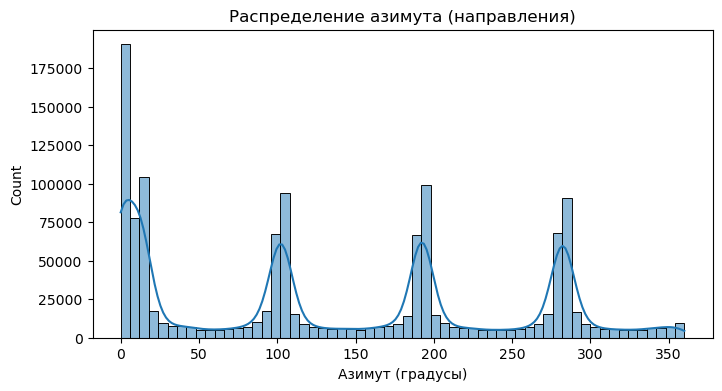

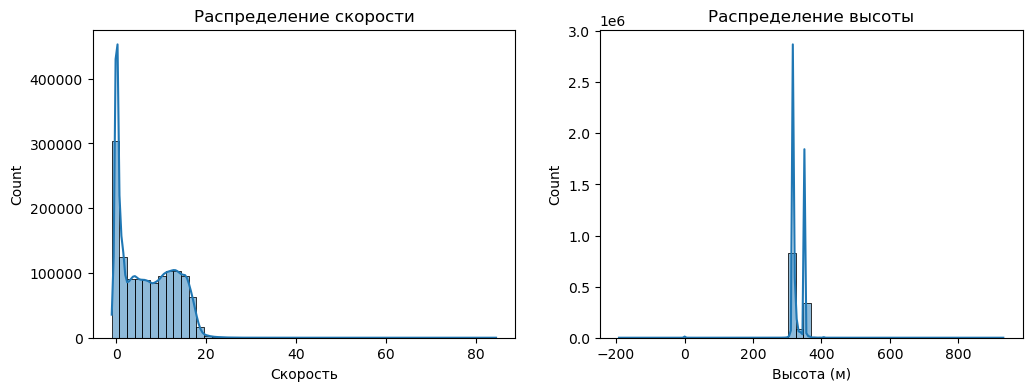

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Загрузка данных
df = pd.read_csv('geo_locations_astana_hackathon.csv')
print("Размер датасета:", df.shape)
print('\nПервые строки данных:')
print(df.head())

# 2. Быстрая статистика по признакам
print("\nСтатистика (describe):")
print(df.describe())

# 3. Количество уникальных поездок
unique_ids = df['randomized_id'].nunique()
print(f"\nУникальных поездок (randomized_id): {unique_ids}")

# 4. Проверка на пропуски
print("\nПропущенные значения по столбцам:")
print(df.isnull().sum())

# 5. Явные выбросы по скорости и высоте
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['spd'])
plt.title('Boxplot скорости')

plt.subplot(1,2,2)
sns.boxplot(x=df['alt'])
plt.title('Boxplot высоты')
plt.show()

# 6. Геодистрибуция точек (быстрая карта)
plt.figure(figsize=(10,7))
plt.scatter(df['lng'], df['lat'], s=1, alpha=0.5)
plt.title('Все точки треков (lng/lat)')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

# 7. Корелляции между числовыми данными
corr = df[['lat','lng','alt','spd','azm']].corr()
print("\nКорреляция между числовыми признаками:")
print(corr)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

# 8. Визуализация одной случайной поездки
random_id = np.random.choice(df['randomized_id'].unique())
trip = df[df['randomized_id'] == random_id]
plt.figure(figsize=(8,6))
plt.plot(trip['lng'], trip['lat'], marker='o', linewidth=2)
plt.title(f'Траектория поездки: {random_id}')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

# 9. Распределение азимута (угла движения)
plt.figure(figsize=(8,4))
sns.histplot(df['azm'], bins=60, kde=True)
plt.title('Распределение азимута (направления)')
plt.xlabel('Азимут (градусы)')
plt.show()

# 10. Гистограмма скорости и высоты
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['spd'], bins=50, kde=True)
plt.title('Распределение скорости')
plt.xlabel('Скорость')

plt.subplot(1,2,2)
sns.histplot(df['alt'], bins=50, kde=True)
plt.title('Распределение высоты')
plt.xlabel('Высота (м)')
plt.show()
